 Project completed by Alejandro Cruz Setzekorn

# Bio 453 Project

## Introduction

        For my computational final project, my goal is to build a rudimentary three-dimensional protein structure prediction model using Markov chain principles. Given the complex undertaking that would be required to build an accurate prediction model, I plan to simplify the process by confining my model to a 2-D lattice, and hopefully expand it into 3 dimensions. Furthermore, I will be limited by the computational power and resources, so I will also keep my protein prediction scope limited. To do that, I will have to determine if working with a particular protein type or a limited dataset of reference structures will be my best option. I will begin by better understanding the structure of a protein, move on to figuring out how we can use amino acid chains to predict those structures, and make references to what type of work has been used within the space of Markov chain simulations. I may or may not look at specific code used by previous models to avoid influencing my own work, but I will most certainly be reading their research papers to gain a better insight into what factors contributed to the development of said work. This will include looking at model diagrams of flow of information and model code structures. Following each model, I will provide a brief discussion on the results and decide where I can go from there. I also plan to start with a very simple prediction method with minimal parameters, and iteratively build on it as much as I can. Each model version will be displayed in the Jupyter notebook upon submission.

## I. Background Information

### i. Understanding The Structure of a Protein

       Before I begin forming my model, I want to go into some detail and learn about the structure of a protein and get a general sense of what factors can influence how a linear chain of amino acids can form into its 3D shape.
       
        Proteins are made up of chains of amino acids. Each one is composed of a carboxylic acid (which contains a carboxyl group, -COOH) and an amino functional group. In between lies an alpha carbon, with an H atom also paired to it. It is the fourth covalent bond in which most variation is seen in each amino acid, and these are known as R groups, or side chains. These play a large role in dictating the functionality and shape of proteins, including how they interact with their environment. The R group will affect the amino acid in how it behaves and attaches to other amino acids, as well as determining if it will become hydrophobic or hydrophilic. A hydrophilic amino acid such as serine may tend to move outwards of the protein structure it’s a part of, while valine may tend to move inwards.

        Peptide bonds (which have directionality) connect amino acids at opposite ends via a covalent bond. The bond itself does not allow for rotation, but the alpha carbon atom does, allowing for the protein to adopt various shapes (and therefore various functions).

        There are various degrees of protein structure. The sequence of amino acids itself for a protein is called its primary structure. Changing just one of the amino acids in the chain can affect the protein’s function and structure, such as in the case of sickle cell anemia, in which two amino acids of a hemoglobin are switched which cause a crescent-shaped deformation that causes blockages within the blood vessel. A normal hemoglobin cell should be pocket-shaped to perform its duty of transporting oxygen. Secondary structures refer to local folded structures. Some of the most common secondary structures include an alpha-helix and a beta-sheet, formed by the chain of amino acids. In an alpha helix, the carbonyl of one of the amino acids bonds to the amino of an amino acid further down the chain, pulling the chain into a helical structure.

        The three-dimensional structure itself is called a tertiary structure, and it is formed in large part due to the R group interactions. Oftentimes, proteins interact with other proteins to carry out their functions, forming to create a quaternary structure (such as in the hemoglobin example, which is composed of two alpha and two beta secondary structures).


### ii. Previous Attempts at Protein Prediction With Markov Chains

        If one were to model every possible folding configuration of a structure for just one single protein, it would soon become computationally impossible, let alone the amount of time that would be required. The benefit of this prediction is that not all potential shapes are likely, as proteins tend to conform to specific local patterns depending on the sequence of amino acids. These local patterns can be called structural motifs. Understanding these motifs can enable researchers to better understand the possible conformations of a folded protein at a local scale, helping to predict the potential structure on a global scale. Hidden Markov models (HMM) are a good tool to use when looking at the context of these motifs and how they transition across a sequence of amino acids. These structural motifs can be used as a template to help predict the structures of proteins.
    
        Ramachandran basins are another method that can be used to map the possible angles amino acids in a protein can adopt relative to one another. It can be parametrized by two angles intervals, phi (angle between the nitrogen atom and the alpha carbon, located in the backbone of the amino acid) and psi (angle between the alpha carbon and the carbonyl carbon), with a range of -180 and 180 degrees, accounting for all possible rotations around the bonds connecting the atoms. Not all angles within this range are equally probable, though. The Ramachandran plot can help to visualize which angles are more likely, or possible.
    
        Finally, another method is FB5-HMM (Hamelryck et al., 2006), which is a model that uses a directional distribution to parametrize local structural biases in protein structures. The model uses theta and tau space rather than phi and psi space, allowing for more complex dependencies to be captured. The main benefit of using this distribution is that it enables this model to form conformations that may not be found in a fragment library that would otherwise be used.
    
        A position-specific hidden Markov model (Cheng et al., 2008), called Fragment-HMM, was developed to predict protein structures. The model predicted protein structures managed to converge within 6 Å of the experimental found structures across six hundred benchmark proteins. It also managed to model the protein structure end-to-end, rather than modeling it in fragmented parts as most models have done in the past. With that said, parts of their work come from three areas of research, which are fragment assembly, hidden Markov model sampling, and Ramachandran basins.
    
        This model focuses on local structural biases and their interactions by combining probabilistic sampling with iterative refinements. It probabilistically samples various protein structure conformations with regards to local structural biases for a particular protein. For each residue (side chain), a cosine model is used to describe the preferred angles (torsion angles phi and psi) that a given protein tends to adopt. This type of model is ideal for capturing periodic or cyclical actions. A position-specific HMM captures structural preferences relating to the preferences of adjacent residues in the sequence by using information from known protein fragments, helping the model to predict how likely certain configurations are. This is known as a Fragment-HMM. The Fragment-HMM samples a sequence of torsion angle pairs and a particular protein sequence, with an energy function that evaluates probabilistically generated decoys (various possible conformations). Lastly, the decoys (as outputs) are fed back into the system, helping to refine estimates of local structural biases and improve the model prediction. This is done until convergence is achieved.

        An incredibly important model to mention would be AlphaFold, which is to date, the most accuracte protein prediction model (in fact, over six times more accurate than the previous model mentioned). I will not dive too deep into this method, though, as it is a vastly complicated advaned tool that uses a deep learning framework and is out of the scope for this project. Therefore, I will not be referencing when building my own model.

## II. Building the Markov Chain Model

### i. Building the First Model

        The first model will be a simple approach that can then be built upon into a more complex prediction model with more paramters later on. The input will be an amino acid chain (random letters for now) sequence, which can then be folded within a two-dimensional lattice grid. Each amino acid will have a set of possible positions that it can take relative to the amino acid before it (such as right, left, up, down). The model will try to predict the most probable configuration and shape of the protein in a very basic form. For now, all movements will be random. Later on, I will try to figure out how to form a slighty realistic probability distribution. 
        
        The steps for this model will be as follows:
        1.) Defining the lattice and possible movements based on the previous amino acid
            - In this case, I will start with a 10x10 grid
        2.) Defining the transition probabilities
            - Transitions in terms of movement/positioning of the next amino acid. The amino acid sequence itself will be given.
        3.) Simulating the folding by starting the first amino acid in the sequence arbitrarily
            - The Markov chain will determine the next position of each amino acid in the sequence
        4.) Output the results
        
        Also to note, I will not be setting a random seed for the randomization of the positioning. I want to see what kind of structures the model can generate for the meantime.

In [448]:
from plotly.offline import init_notebook_mode

# Set up Plotly to work in offline mode with JupyterLab
init_notebook_mode(connected=True)

In [449]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import plotly.graph_objects as go

In [450]:
# Parameters
grid_size = 10
sequence = "ABCDEFGHIJKLMNOPQRSTUVWXYZ" # Simply starting with random characters for now (just the alphabet). Later on, will be replaced with actual amino acids representations

# Initializing the grid
grid = np.zeros((grid_size, grid_size), dtype=str)

# If top left corner of grid is position (0,0), then starting position will be (6,6)
start_pos = (grid_size // 2, grid_size // 2) 
grid[start_pos] = sequence[0]  # Placing the first amino acid

# Possible movements
movements = {'right': (0, 1), 'left': (0, -1), 'up': (-1, 0), 'down': (1, 0)
}

def valid_position(pos):
    """ 
    Check if the position is within the grid and unoccupied 
    """
    x, y = pos # Unpacking 'pos'
    # Ensure coordinates are within the defined bounds and that there is nothing in current position.
    if 0 <= x < grid_size and 0 <= y < grid_size and grid[x, y] == '': 
        return True
    return False

def predict_structure():
    """
    Object that simulate the sequential placement
    of amino acids in 2-D space (2-D grid).
    """
    current_pos = start_pos # Initialize a current position variable with 'start_pos'
    for aa in sequence[1:]:  # Starting from the second amino acid ('aa'), iterate over rest of sequence
        possible_moves = [] # Will store possible valid movements
        # Check valid movements
        for move, delta in movements.items(): # Iterate over possible movements defined in 'movements' dictionary
        # 'move' is name of movement, 'delta' is the change in x or y coordinates
            new_pos = (current_pos[0] + delta[0], current_pos[1] + delta[1]) # Find the next position
            if valid_position(new_pos): # Use 'valid_position' function to check validity of moves
                possible_moves.append(new_pos) # Append valid moves to 'possible_moves'
        
        # Break statement in case of present invalid moves
        if not possible_moves: 
            print("No valid moves available.")
            break
        
        # Randomly select the next position from valid moves
        next_pos = possible_moves[np.random.randint(len(possible_moves))] # Randomly selecting a possible move
        grid[next_pos] = aa # Place current amino acid 
        current_pos = next_pos # Set 'current_pos' as 'next_pos'

predict_structure()

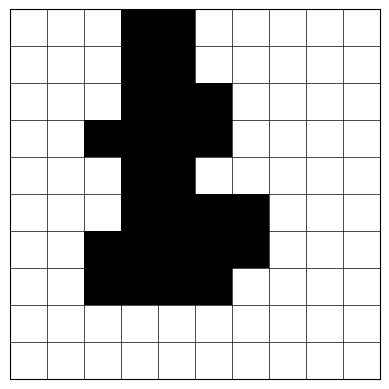

In [451]:
plt.figure()
plt.imshow(grid != '', cmap='Greys', interpolation='none')
plt.grid(True, which='both', color='black', linewidth=0.5)
plt.xticks(np.arange(-.5, grid_size, 1), [])
plt.yticks(np.arange(-.5, grid_size, 1), [])
plt.tick_params(axis=u'both', which=u'both', length=0)
plt.show()

### Brief Discussion on First Model

        Okay, this does not really do much! It lacks any complexity that pertains to simulating a real model. I also do not like the visualization as it is. But it provides me with an idea of how I can start improving the model. I will try to expand the set of rules and parameters, including attempting to model it in 3D. 

### ii. Building the Second Markov Model

        For this next attempt at the model, the only thing I will change is attempt to move it into a 3D lattice grid. This will hopefully provide a bit more complexity for the final model since while one can define the protein chain itself is one-dimensional, upon folding, it will turn into a three-dimensional structure. For this next model iteration, changes that will be made include: 
        
        1.) Redefining the grid and converting it into a 3D lattice
        2.) Adding further possible movements accordingly and updating the transition probabilities (again, totally random for now)
        3.) Simulating the protein folding and outputing the structure in a 3D visual plot. 


In [455]:
grid_size = 10 # Again defining the grid to be the same size for now (will increase the grid size significantly later on)
sequence = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

grid = np.zeros((grid_size, grid_size, grid_size), dtype=str) # Adding a third dimension

start_pos = (grid_size // 2, grid_size // 2, grid_size // 2)
grid[start_pos] = sequence[0]

movements = {'right': (0, 1, 0), 'left': (0, -1, 0), 'up': (-1, 0, 0), 'down': (1, 0, 0),
            'forward': (0, 0, 1), 'backward': (0, 0, -1)} # Adding a third dimension of possible positioning

def valid_position(pos):
    x, y, z = pos
    if 0 <= x < grid_size and 0 <= y < grid_size and 0 <= z < grid_size and grid[x, y, z] == '':
        return True
    return False

def predict_structure_3d():
    current_pos = start_pos
    for aa in sequence[1:]:
        possible_moves = []
        for move, delta in movements.items():
            new_pos = (current_pos[0] + delta[0], current_pos[1] + delta[1], current_pos[2] + delta[2])
            if valid_position(new_pos):
                possible_moves.append(new_pos)
        
        if not possible_moves:
            print("No valid moves available.")
            break
        
        next_pos = possible_moves[np.random.randint(len(possible_moves))]
        grid[next_pos] = aa
        current_pos = next_pos

predict_structure_3d()

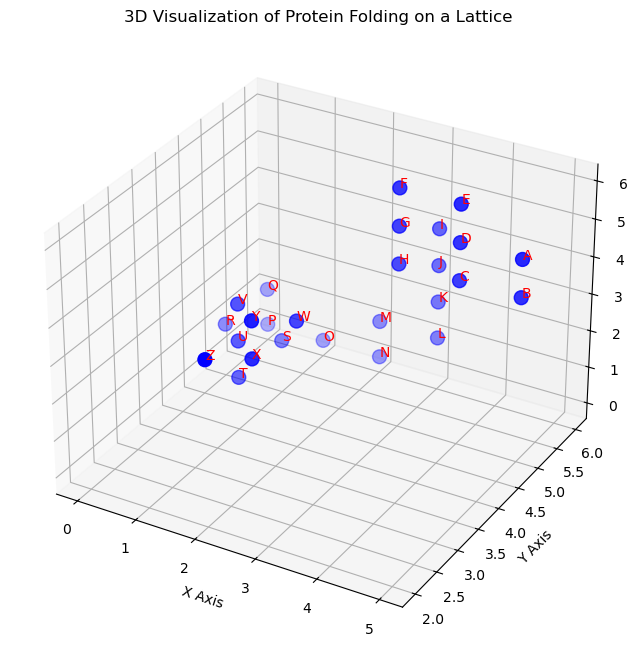

In [456]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

indices = np.where(grid != '')
x, y, z = indices[0], indices[1], indices[2]

ax.scatter(x, y, z, color='blue', s=100)

for i in range(len(x)): # Labeling the points
    ax.text(x[i], y[i], z[i], grid[x[i], y[i], z[i]], color='red')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Visualization of Protein Folding on a Lattice')

plt.show()

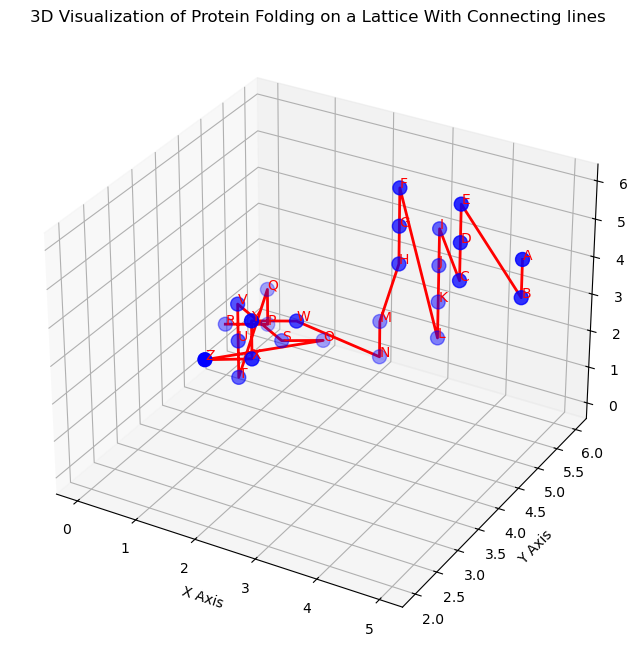

In [457]:
# Same graph as above, but now connecting each point 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
indices = np.where(grid != '')
x, y, z = indices[0], indices[1], indices[2] 

ax.scatter(x, y, z, color='blue', s=100) 

# Drawing lines between the points
ax.plot(x, y, z, color='red', linewidth=2)

for i in range(len(x)): # Labeling the points
    ax.text(x[i], y[i], z[i], grid[x[i], y[i], z[i]], color='red')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Visualization of Protein Folding on a Lattice With Connecting lines')

plt.show()

        The visualization results are much better than before, but still not perfect. There are a couple of points that are very far from one another (at least from this perspective), which is not what I want if I want to try and model amino acids in a chain together. With that said, this looks like a better model to work off from. Before getting making the probabilities more realistic, I will incorporate amino acids into the model for my next iteration of it. I will also try to get the 3D model to be rotatable so I can better analyze the results. 

### iii. Building the Third Markov Model

        For this iteration of the model, I want to incorporate a bit more complexity by listing out 20 amino acids and various characteristics of each, including their polarity and hydrophobcity. I'm not sure how relavent some of these characteristics will become later down the line with regards to the probability distributions I can aquire. This will just give me an idea of how I can expand my model by incorporating a bit mroe complexity to it. The properties I will use for now will provide another level of complexity in terms of the types of interactions amino acids can have. For example, if hydrophobic is True for an amino acid, then perhaps I can model it so that it tends to move towards the center (in this manner, it will simulate a hydrophobic amino acid that will try to get away from the H20 heavy environment outside of the defined lattice grid). The opposite can be true if hydrophobic is False. There is a lot to consider, so for the meantime, I will still take iterations of this model one step at a time.
        
        Steps for building this model will include:
        1.) Initializing the amino acid data
            - For now, only include properties of polarity and hydropathy
        2.) Defining movement function
            - This function will be expanded to try and model more complicated movement for the given characteristics of the amino acids
        3.) Running the protein folding simulation
            - See how well the model incorporates the new amino acid characteristics

In [461]:
# Defining amino acids with characteristics of polarity and hydropahy, including a an index that defines the level of hydropathy
amino_acids = {
    'A': {'name': 'Alanine', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': 1.8},
    'R': {'name': 'Arginine', 'polarity': 'polar', 'hydropathy': 'hydrophilic', 'index': -4.5},
    'N': {'name': 'Asparagine', 'polarity': 'polar', 'hydropathy': 'hydrophilic', 'index': -3.5},
    'D': {'name': 'Aspartic acid', 'polarity': 'polar', 'hydropathy': 'hydrophilic', 'index': -3.5},
    'C': {'name': 'Cysteine', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': 2.5},
    'Q': {'name': 'Glutamine', 'polarity': 'polar', 'hydropathy': 'hydrophilic', 'index': -3.5},
    'E': {'name': 'Glutamic acid', 'polarity': 'polar', 'hydropathy': 'hydrophilic', 'index': -3.5},
    'G': {'name': 'Glycine', 'polarity': 'nonpolar', 'hydropathy': 'neutral', 'index': -0.4},
    'H': {'name': 'Histidine', 'polarity': 'polar', 'hydropathy': 'neutral', 'index': -3.2},
    'I': {'name': 'Isoleucine', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': 4.5},
    'L': {'name': 'Leucine', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': 3.8},
    'K': {'name': 'Lysine', 'polarity': 'polar', 'hydropathy': 'hydrophilic', 'index': -3.9},
    'M': {'name': 'Methionine', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': 1.9},
    'F': {'name': 'Phenylalanine', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': 2.8},
    'P': {'name': 'Proline', 'polarity': 'nonpolar', 'hydropathy': 'neutral', 'index': -1.6},
    'S': {'name': 'Serine', 'polarity': 'polar', 'hydropathy': 'neutral', 'index': -0.8},
    'T': {'name': 'Threonine', 'polarity': 'polar', 'hydropathy': 'neutral', 'index': -0.7},
    'W': {'name': 'Tryptophan', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': -0.9},
    'Y': {'name': 'Tyrosine', 'polarity': 'nonpolar', 'hydropathy': 'neutral', 'index': -1.3},
    'V': {'name': 'Valine', 'polarity': 'nonpolar', 'hydropathy': 'hydrophobic', 'index': 4.2}
}

# Setup for a 3D protein folding simulation
grid_size = 20  # Increasing size of each dimension in the 3D grid
grid = np.full((grid_size, grid_size, grid_size), '', dtype=str)  # Initialize a 3D grid with empty strings
start_pos = (grid_size // 2, grid_size // 2, grid_size // 2) 
movements = {'up': (1, 0, 0), 'down': (-1, 0, 0), 'left': (0, -1, 0), 'right': (0, 1, 0), 'forward': (0, 0, 1), 'backward': (0, 0, -1)}

def valid_position(pos):
    x, y, z = pos
    if 0 <= x < grid_size and 0 <= y < grid_size and 0 <= z < grid_size and grid[x, y, z] == '':
        return True
    return False

def get_preferred_moves(aa, current_pos):
    """ 
    Determines preferred moves based on amino acid properties. 
    """
    directions = []
    center_vector = np.array([grid_size // 2, grid_size // 2, grid_size // 2]) - np.array(current_pos)
    norm_vector = np.sign(center_vector)  # Direction towards or away from the center

    # Move hydrophobic and nonpolar amino acids towards the center
    if amino_acids[aa]['hydropathy'] == 'hydrophobic' or amino_acids[aa]['polarity'] == 'nonpolar':
        new_pos = tuple(np.array(current_pos) + norm_vector)
        if valid_position(new_pos):
            directions.append(new_pos)

    # Move hydrophilic and polar amino acids away from the center
    elif amino_acids[aa]['hydropathy'] == 'hydrophilic' or amino_acids[aa]['polarity'] == 'polar':
        new_pos = tuple(np.array(current_pos) - norm_vector)  # Opposite direction
        if valid_position(new_pos):
            directions.append(new_pos)

    return directions

def predict_structure_3d(sequence):
    current_pos = start_pos
    grid[current_pos] = sequence[0]  

    for aa in sequence[1:]:
        preferred_moves = get_preferred_moves(aa, current_pos)
        if preferred_moves:
            next_pos = random.choice(preferred_moves)  # Choose from preferred moves based on properties
        else:
            # If no preferred moves, make a random valid move
            next_pos = None
            while not next_pos:
                random_move = random.choice(list(movements.values()))
                potential_pos = tuple(np.array(current_pos) + np.array(random_move))
                if valid_position(potential_pos):
                    next_pos = potential_pos

        grid[next_pos] = aa  # Place amino acid at the chosen position
        current_pos = next_pos

    return grid

sequence = 'ACDEFGHIKLMNPQRSTVWY'  # Example sequence
result_grid = predict_structure_3d(sequence)

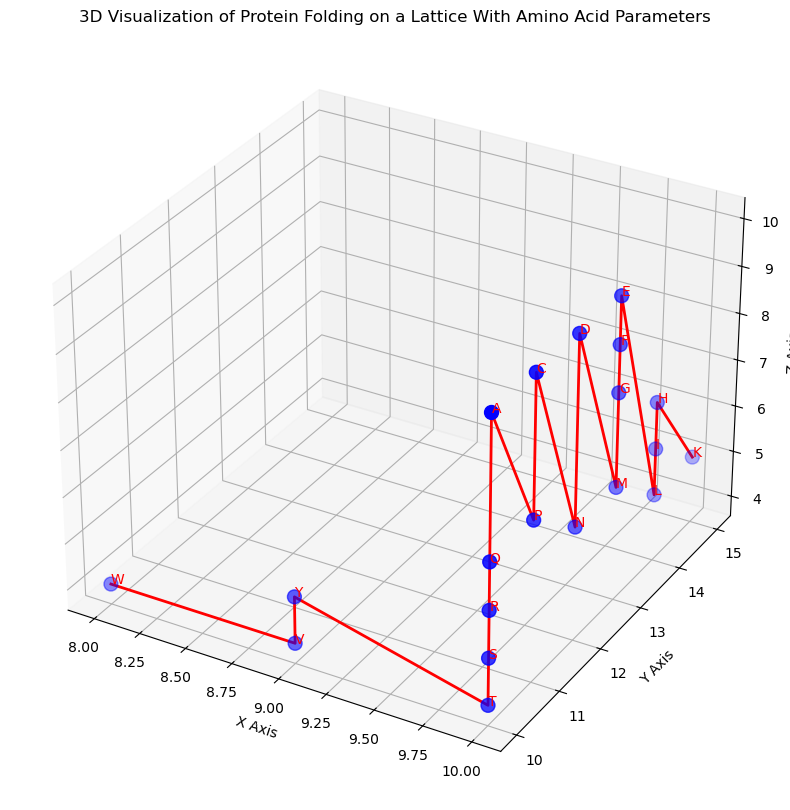

In [462]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
indices = np.where(grid != '')
x, y, z = indices[0], indices[1], indices[2] 

ax.scatter(x, y, z, color='blue', s=100) 

ax.plot(x, y, z, color='red', linewidth=2)

for i in range(len(x)): 
    ax.text(x[i], y[i], z[i], grid[x[i], y[i], z[i]], color='red')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Visualization of Protein Folding on a Lattice With Amino Acid Parameters')

plt.show()

        It is a bit difficult to interpret the results above as they do not seem so different when I modeled without the new parameters, but the structure does seem less random. It appears to have some sort of directionality, unlike the previous one. To get a better idea of the structure, I am going to try a library called plotly. 

In [464]:
indices = np.where(grid != '')
x, y, z = indices[0], indices[1], indices[2] 
labels = grid[x, y, z]

fig1 = go.Figure()

fig1.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    marker=dict(
        size=5,
        color='blue',
    ),
    text=labels,  
    textposition="top center"
))

fig1.add_trace(go.Scatter3d( # Adding lines to connect points
    x=x, y=y, z=z,
    mode='lines',
    line=dict(
        color='red', 
        width=2
    )
))

fig1.update_layout(
    title='3D Visualization of Protein Folding on a Lattice With Amino Acid Parameters',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
        xaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        yaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        zaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)")
    ),
    showlegend=False
)

fig1.show()


        From the rotatable visualization, it appears as if the structure the wall and is forced to move upwards. While that is not what I expected (the structure never seems to turn around), the parameters do indeed seem to guide it in a more directional manner. My attempt at incorporating the tendency for particular amino acids to turn inwards or outwards doesn't seem to be captured in the model. I am going to try and model a larger randomized amino acid sequence to see what happens next.

In [466]:
grid_size = 50  # Increasing grid size
grid = np.full((grid_size, grid_size, grid_size), '', dtype=str)  
start_pos = (grid_size // 2, grid_size // 2, grid_size // 2) 
movements = {'up': (1, 0, 0), 'down': (-1, 0, 0), 'left': (0, -1, 0), 'right': (0, 1, 0), 'forward': (0, 0, 1), 'backward': (0, 0, -1)}

sequence_longer = 'VKQNTDKHDEWQPLWPITMAPYTFWGCVYWETCVPHFMVYMRDWDQKSWGITEREWIGDKFQCTLIWDMIYKGIKNGGCVLHRSTKQDFYFQSMFRNAVF' # Sequence of length 100
result_grid_longer = predict_structure_3d(sequence_longer)

indices = np.where(grid != '')
x, y, z = indices[0], indices[1], indices[2] 
labels = grid[x, y, z]

fig2 = go.Figure()

fig2.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    marker=dict(
        size=5,
        color='blue',
    ),
    text=labels,  
    textposition="top center"
))

fig2.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(
        color='red', 
        width=2
    )
))

fig2.update_layout(
    title='3D Visualization of Protein Folding on a Lattice With Amino Acid Parameters',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
        xaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        yaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        zaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)")
    ),
    showlegend=False
)

fig2.show()


        The results are much more interesting when the sequence becomes longer. By rotating the figure above, I am able to tell that there are longer streteches of amino acids forming in a straight line, but also turning around at certain points. The overall structure does still have somewhat of a direction. I think it may be too hard to model more complicated turns, so I will have to stay with the 3D lattice grid. 
        
        For comparison, I will submit that same sequence as above ('sequence_longer') to see what AlphaFold predicts. I do not in any expect my prediction to align with what AlphaFold predicts, but I just think it would be interesting nonetheless.
        
        Update: It is so unfortunate that I could not get the AlphaFold code to run. The code file is available for download at this website: 
            https://proteopedia.org/wiki/index.php/How_to_predict_structures_with_AlphaFold
        But I could not find any solutions to trouble shooting issues I had. Nonetheless, it is great that the code is easily available, and it would very interesting to explore the file in more detail and hopefully get it to work so I can simulate protein structures with it.

        I did find the amino acid sequence for an alpha helix from the Protein Data Bank, so I'll compare my result to the actual alpha helix structure.

In [469]:
grid_size = 100 
grid = np.full((grid_size, grid_size, grid_size), '', dtype=str)  
start_pos = (grid_size // 2, grid_size // 2, grid_size // 2) 
movements = {'up': (1, 0, 0), 'down': (-1, 0, 0), 'left': (0, -1, 0), 'right': (0, 1, 0), 'forward': (0, 0, 1), 'backward': (0, 0, -1)}

alpha_helix = 'MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKIELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL'
result_grid_alpha = predict_structure_3d(alpha_helix)

indices = np.where(grid != '')
x, y, z = indices[0], indices[1], indices[2] 
labels = grid[x, y, z]

fig3 = go.Figure()

fig3.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    marker=dict(
        size=5,
        color='blue',
    ),
    text=labels,  
    textposition="top center"
))

fig3.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(
        color='red', 
        width=2
    )
))

fig3.update_layout(
    title='3D Visualization of Protein Folding on a Lattice With Amino Acid Parameters',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
        xaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        yaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)"),
        zaxis=dict(showbackground=True, backgroundcolor="rgb(230, 230,230)")
    ),
    showlegend=False
)

fig3.show()


        As expcted, the structure is nowhere near to that of an actual alpha helix. I find it interesting that my prediction tried to somewhat take on the helical shape in certain parts, as noted by the several back and forth movements. Then again, that could be not at all related what I have is more of a random model rather than anything close to the actual protein structure.

## III. Conclusion/ Final Thoughts

        Unfortunatley, I was not able to complete the project to the extent that I wanted to. A lot of time was spent in better understanding the structures of proteins so that I could get a better idea of how to model them. Most of what I completed involved randomization rather than gathering actual transition probabilities. Still, while I will not be competing in the CASP15 competition anytime soon with my model, I think that I did manage to build a decent starting point for protein structure modeling that could be improved upon. What would help is moving the space beyond a lattice to incorporate angle positioning, as well as aquire realistic probability/transition distributions. I will try to continue this project on my own to see if I can incorporate any of these additions to my model. 

# References and Citations
- https://webhost.bridgew.edu/fgorga/proteins/aminoacids.htm#:~:text=The%20non%2Dpolar%20amino%20acids,lysine%2C%20serine%2C%20and%20threonine. 
    - Used for determining polarity of each amino acid
- https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/IMGTclasses.html#:~:text=Amino%20acids%20in%20each%20class,%2C%20Q%2C%20E%2C%20K.
    - Used for acquiring hydropathy and index values
- https://www.bioinformatics.org/sms2/random_protein.html
    - Used to generate random protein sequences of variable lengths
- https://www.rcsb.org/
    - Used to aquire alpha helix amino acid sequence
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2578800/
    - Referencing previous work done in this area of study
- Quickstart Molecular Biology: An Introduction for Mathematicians, Physicists, and Computatonal Scientists by Philip N. Benfey
    - Used to help me better understand the structure of proteins